In [1]:
def BrownianMotionStrategy(s, q, T_exp, t, sigma, gamma, A):
    r_a = s + (-1 + 2*q)*(-0.5*sigma*sigma*gamma*(T_exp-t))
    r_b = s + (1 + 2*q)*(-0.5*sigma*sigma*gamma*(T_exp-t))
    delta_a = r_a - s + np.log(1 + gamma/K)/gamma
    delta_b = s -r_b + np.log(1+gamma/K)/gamma
    lambda_a = A*(np.exp(-K*delta_a))
    lambda_b = A*(np.exp(-K*delta_b))
    return r_a, r_b, delta_a, delta_b, lambda_a, lambda_b

In [2]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

In [3]:
t = bernoulli.rvs(0.5)

In [4]:
t

0

In [5]:
import numpy as np
from tqdm import tqdm
s = 100
T_exp = 1
dt = 0.005
q = 0
gamma = 0.1
sigma = 2
K = 1.5
A = 140
t = 0
x = 0
s_price = [s]
p_a_dyn = []
p_b_dyn = []
results = []

In [6]:
for i in tqdm(range(10000)):
    s = 100
    T_exp = 1
    dt = 0.005
    q = 0
    gamma = 0.1
    sigma = 2
    K = 1.5
    A = 140
    t = 0
    x = 0
    s_price = [s]
    p_a_dyn = []
    p_b_dyn = []
    while t < T_exp:
        r_a, r_b, delta_a, delta_b, lambda_a, lambda_b = BrownianMotionStrategy(s, q, T_exp, t, sigma, gamma, A)
        p_a = s_price[-1] + delta_a
        p_b = s_price[-1] - delta_b
        p_a_dyn.append(p_a)
        p_b_dyn.append(p_b)
        prob_a = lambda_a*dt
        prob_b = lambda_b*dt
        t_a = bernoulli.rvs(min(prob_a, 1))
        t_b = bernoulli.rvs(min(prob_b, 1))
        if t_a == 1:
            q -= 1
            x += s + delta_a
        if t_b == 1:
            q += 1
            x -= s - delta_b
        t_c = bernoulli.rvs(0.5)
        if t_c == 1:
            s_price.append(s_price[-1] + sigma*np.sqrt(dt))
        else:
            s_price.append(s_price[-1] - sigma*np.sqrt(dt))
        t += dt
    results.append(x + s_price[-1]*q)

100%|██████████| 10000/10000 [02:53<00:00, 57.62it/s]


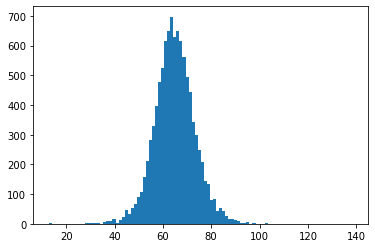

In [7]:
_, _, _ = plt.hist(results, bins = 100)

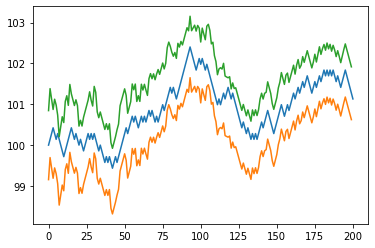

In [8]:
plt.plot(s_price)
plt.plot(p_b_dyn)
plt.plot(p_a_dyn)